In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [ ]:
df = pd.read_csv('drive/MyDrive/Data Mining 2023/marketing_campaign.csv','\t')

<ipython-input-529-428166a79ccb>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('drive/MyDrive/Data Mining 2023/marketing_campaign.csv','\t')


In [ ]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


Check for null values and drop

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.isnull().sum().sum()

24

In [ ]:
df = df.dropna()

Convert Date to Date Time Object

In [ ]:
import datetime as dtime
from datetime import date
from datetime import datetime
date_format = "%d-%m-%Y"
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda val: datetime.strptime(val, date_format))

In [ ]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

Print unique values of Marital_Status and Education

In [ ]:
print(df.Marital_Status.unique().tolist())
print(df.Education.unique().tolist())

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']


Converting Object type column "Marital Status" and "Education" to integer


Change values "Yolo", "Alone", "Absurd" of column "Education" to "Single" 

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'],'Single')

Encode Object type columns "Marital_Status" and "Education" to integers

In [ ]:
df[['Marital_Status']] = df[['Marital_Status']].apply(lambda col:pd.Categorical(col).codes)
df[['Education']] = df[['Education']].apply(lambda col:pd.Categorical(col).codes)

Plot count values

<Axes: >

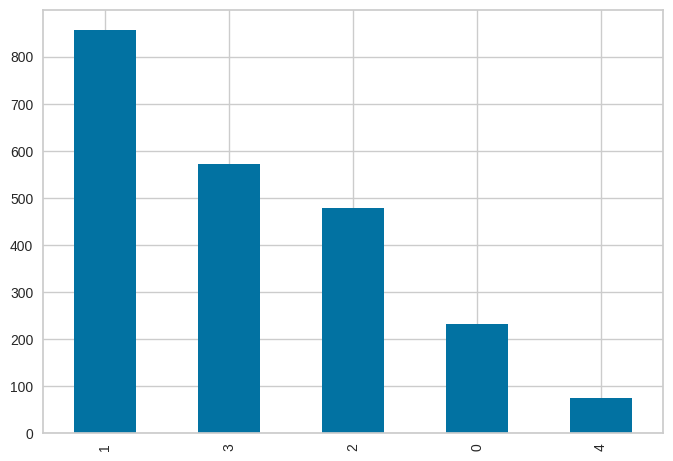

In [ ]:
df.Marital_Status.value_counts().plot(kind='bar')

<Axes: >

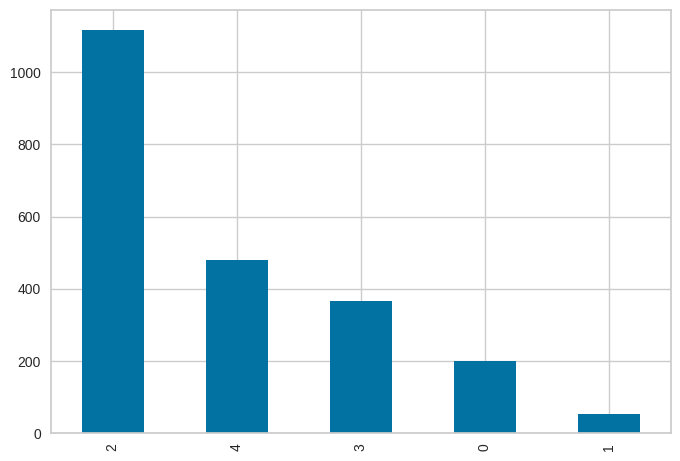

In [ ]:
df.Education.value_counts().plot(kind='bar')

Attribute "Customer_For" 


```
(Current_Date - Recency) - Dt_Customer
```



In [ ]:
df['Recency']

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2216, dtype: int64

In [ ]:
today = datetime.today().strftime(date_format)

In [ ]:
df['Customer_For'] = df.apply(lambda x: dtime.datetime.strptime(today, date_format) - dtime.timedelta(days=x['Recency']), axis=1)

In [ ]:
df['Customer_For'] = df.apply(lambda x: x['Customer_For'] - x['Dt_Customer'], axis=1)

In [ ]:
df['Customer_For'].head

<bound method NDFrame.head of 0      3832 days
1      3302 days
2      3513 days
3      3340 days
4      3294 days
          ...   
2235   3562 days
2236   3190 days
2237   3291 days
2238   3375 days
2239   3809 days
Name: Customer_For, Length: 2216, dtype: timedelta64[ns]>

Attribute "Age"

In [ ]:
df['Age'] = df.apply(lambda x: datetime.today().year - x['Year_Birth'], axis=1)

In [ ]:
df['Age'].head(10)

0    66
1    69
2    58
3    39
4    42
5    56
6    52
7    38
8    49
9    73
Name: Age, dtype: int64

Attribute "Spent"

In [ ]:
df['Spent'] = df.apply(lambda x: x['MntWines'] + x['MntFruits'] + x['MntMeatProducts'] + x['MntFishProducts'] + x['MntSweetProducts'] + x['MntGoldProds'], axis=1)

Attribute "Children"

In [ ]:
df['Children'] = df.apply(lambda x: x['Kidhome'] + x['Teenhome'], axis=1)

Attribue "Family Size"

In [ ]:
df['Family_Size'] = df.apply(lambda x: x['Children'], axis=1)

In [ ]:
df.loc[df['Marital_Status'] == 'Married', 'Family_Size'] = df['Family_Size'] + 2
df.loc[df['Marital_Status'] == 'Together', 'Family_Size'] = df['Family_Size'] + 2
df.loc[df['Marital_Status'] == 'Widow', 'Family_Size'] = df['Family_Size'] + 1
df.loc[df['Marital_Status'] == 'Single', 'Family_Size'] = df['Family_Size'] + 1
df.loc[df['Marital_Status'] == 'Divorced', 'Family_Size'] = df['Family_Size'] + 1

Attribute "Is_Parent"

In [ ]:
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df['Is_Parent'].head(5)

0    0
1    1
2    0
3    1
4    1
Name: Is_Parent, dtype: int64

Attribue "Living With"

In [ ]:
df['Living_With'] = df['Marital_Status'].apply(lambda x: "Partner" if x == "Married" or x == "Together" else "Alone")

Attribute "Age_Group"

In [ ]:
df.loc[(df['Age'] >= 21) & (df['Age'] <= 30), 'Age_Group'] = '21-30'
df.loc[(df['Age'] >= 31) & (df['Age'] <= 40), 'Age_Group'] = '31-40'
df.loc[(df['Age'] >= 41) & (df['Age'] <= 50), 'Age_Group'] = '41-50'
df.loc[(df['Age'] >= 51) & (df['Age'] <= 60), 'Age_Group'] = '51-60'
df.loc[(df['Age'] >= 61) & (df['Age'] <= 70), 'Age_Group'] = '61-70'

Check for out of bounds values

In [ ]:
df['MntWines'].head(10)

0    635
1     11
2    426
3     11
4    173
5    520
6    235
7     76
8     14
9     28
Name: MntWines, dtype: int64

In [ ]:
df.dtypes

ID                               int64
Year_Birth                       int64
Education                         int8
Marital_Status                    int8
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer             datetime64[ns]
Recency                          int64
MntWines                         int64
MntFruits                        int64
MntMeatProducts                  int64
MntFishProducts                  int64
MntSweetProducts                 int64
MntGoldProds                     int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                 

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,2,2,58138.0,0,0,2012-09-04,58,635,...,11,1,3832 days,66,1617,0,0,0,Alone,61-70
1,2174,1954,2,2,46344.0,1,1,2014-03-08,38,11,...,11,0,3302 days,69,27,2,2,1,Alone,61-70
2,4141,1965,2,3,71613.0,0,0,2013-08-21,26,426,...,11,0,3513 days,58,776,0,0,0,Alone,51-60
3,6182,1984,2,3,26646.0,1,0,2014-02-10,26,11,...,11,0,3340 days,39,53,1,1,1,Alone,31-40
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,11,0,3294 days,42,422,1,1,1,Alone,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,11,0,3562 days,56,1341,1,1,1,Alone,51-60
2236,4001,1946,4,3,64014.0,2,1,2014-06-10,56,406,...,11,0,3190 days,77,444,3,3,1,Alone,NaN
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,11,0,3291 days,42,1241,0,0,0,Alone,41-50
2238,8235,1956,3,3,69245.0,0,1,2014-01-24,8,428,...,11,0,3375 days,67,843,1,1,1,Alone,61-70


In [ ]:
df_to_drop = df[(df['ID'] <= 0) | 
                (df['Year_Birth'] <= 1923) |
                (df['Income'] <= 0) |
                (df['Complain'] < 0) |
                (df['Kidhome'] < 0) | 
                (df['Teenhome'] < 0) | 
                (df['Teenhome'] < 0) |
                (df['Recency'] > 500) | 
                (df['MntWines'] <= 0) | 
                (df['MntFruits'] <= 0) | 
                (df['MntMeatProducts'] < 0) | 
                (df['MntSweetProducts'] < 0) |
                (df['NumWebPurchases'] < 0) |
                (df['NumCatalogPurchases'] < 0) |
                (df['NumStorePurchases'] < 0) |
                (df['NumWebVisitsMonth'] < 0) |
                (df['MntGoldProds'] < 0)].index
df.drop(df_to_drop , inplace=True)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Living_With,Age_Group
0,5524,1957,2,2,58138.0,0,0,2012-09-04,58,635,...,11,1,3832 days,66,1617,0,0,0,Alone,61-70
1,2174,1954,2,2,46344.0,1,1,2014-03-08,38,11,...,11,0,3302 days,69,27,2,2,1,Alone,61-70
2,4141,1965,2,3,71613.0,0,0,2013-08-21,26,426,...,11,0,3513 days,58,776,0,0,0,Alone,51-60
3,6182,1984,2,3,26646.0,1,0,2014-02-10,26,11,...,11,0,3340 days,39,53,1,1,1,Alone,31-40
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,11,0,3294 days,42,422,1,1,1,Alone,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,2,1,34421.0,1,0,2013-07-01,81,3,...,11,0,3509 days,49,30,1,1,1,Alone,41-50
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,11,0,3562 days,56,1341,1,1,1,Alone,51-60
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,11,0,3291 days,42,1241,0,0,0,Alone,41-50
2238,8235,1956,3,3,69245.0,0,1,2014-01-24,8,428,...,11,0,3375 days,67,843,1,1,1,Alone,61-70


Heatmap

<ipython-input-561-547c572d6538>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mkt_data1.corr(), )


<Axes: >

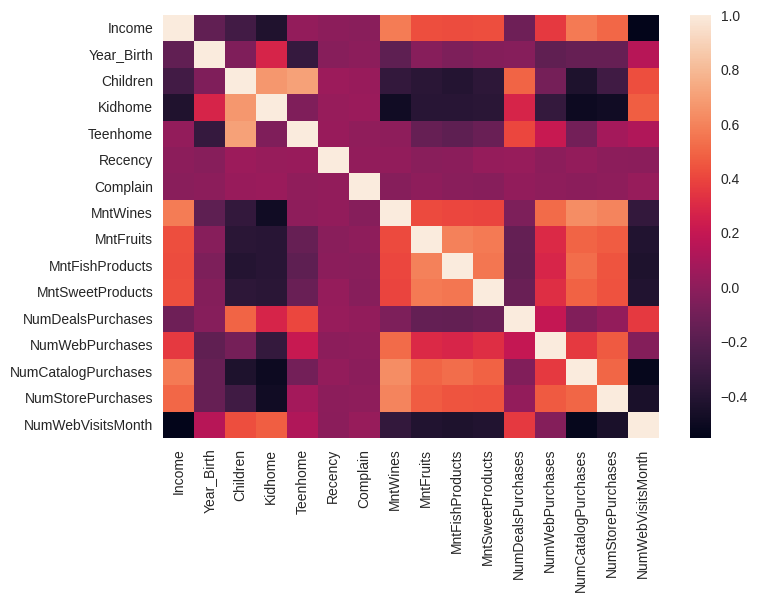

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
mkt_data1=df[["Income", 
              "Year_Birth",
              "Children",
              "Kidhome",
              "Teenhome",
              "Dt_Customer",
              "Recency",
              "Complain",
              "MntWines",
              "MntFruits",
              "MntFishProducts",
              "MntSweetProducts",
              "NumDealsPurchases", 
              "NumWebPurchases", 
              "NumCatalogPurchases",
              "NumStorePurchases",
              "NumWebVisitsMonth",]]
sns.heatmap(mkt_data1.corr(), )

Graphs

Question 1

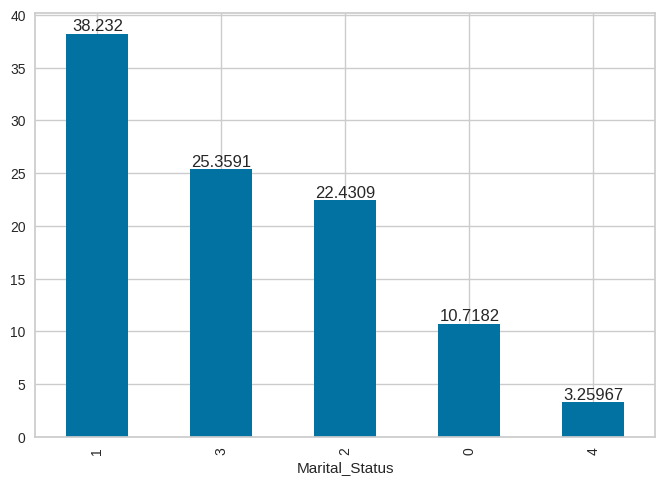

In [ ]:
temp_df = (df.groupby('Marital_Status').size().sort_values(ascending=False) / df.groupby('Marital_Status').size().sort_values(ascending=False).sum())*100
    
ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

Question 2

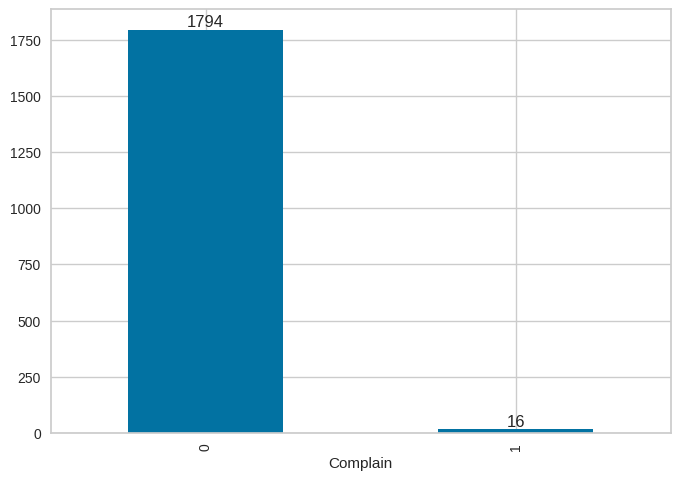

In [ ]:
temp_df = df.groupby('Complain').size().sort_values(ascending=False)

ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

Question 3

In [ ]:
df['Spent'].corr(df['Marital_Status'])

0.031078791976853145

<Axes: >

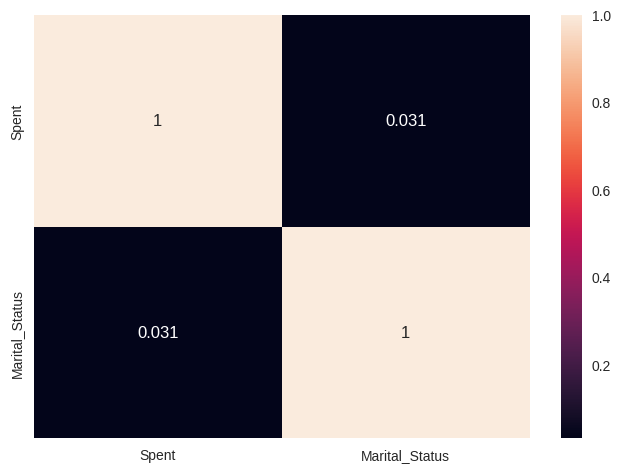

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
mkt_data1=df[["Spent", "Marital_Status"]]
sns.heatmap(mkt_data1.corr(),annot=True )

Question 4

<Axes: >

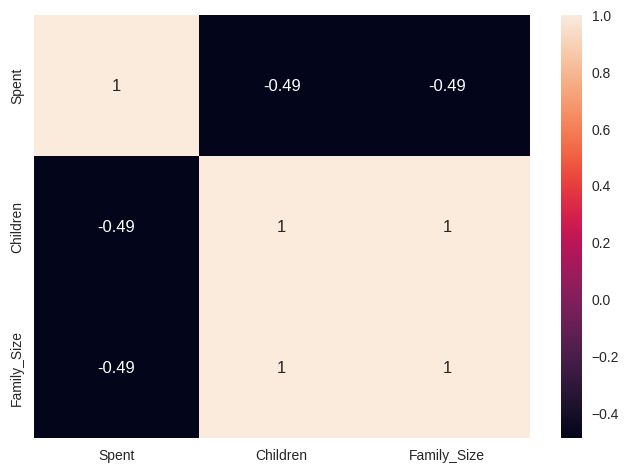

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
mkt_data1=df[["Spent", "Children", "Family_Size"]]
sns.heatmap(mkt_data1.corr(),annot=True )

In [ ]:
df["Spent"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

Question 5

Converting Object type column "Age_Group" to integer

In [ ]:
df["Age_Group_To_Int"] = df[['Age_Group']].apply(lambda col:pd.Categorical(col).codes)

<Axes: >

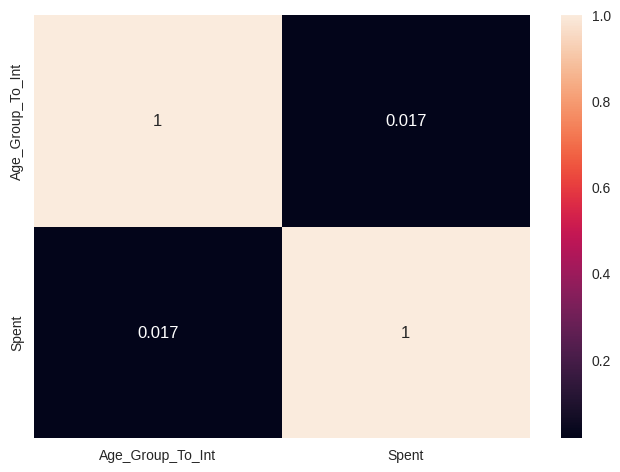

In [ ]:
mkt_data1=df[["Age_Group_To_Int", "Spent"]]
sns.heatmap(mkt_data1.corr(),annot=True )

Question 6

<Axes: >

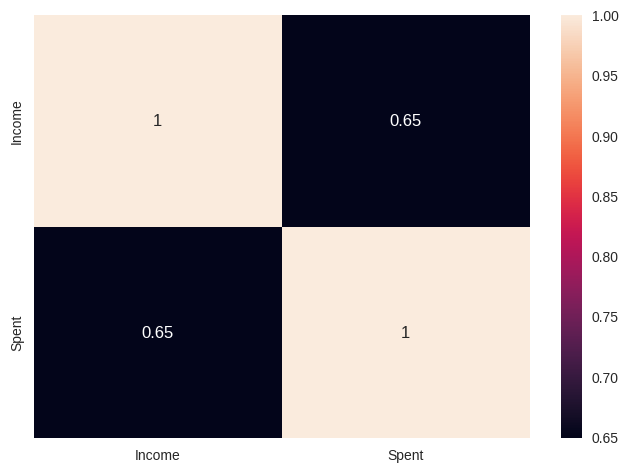

In [ ]:
mkt_data1=df[["Income", "Spent"]]
sns.heatmap(mkt_data1.corr(),annot=True)

Question 7

<Axes: >

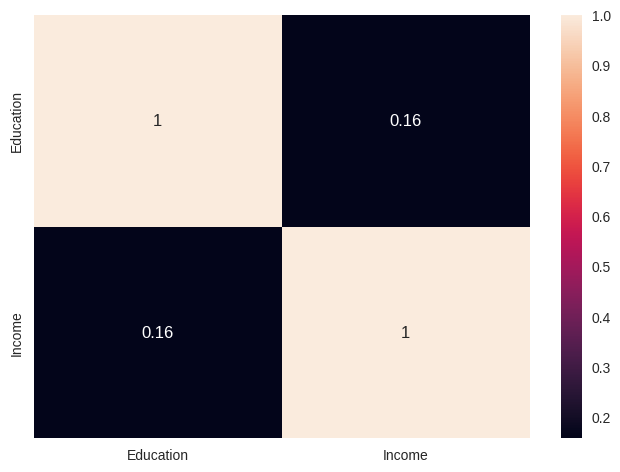

In [ ]:
mkt_data1=df[["Education", "Income"]]
sns.heatmap(mkt_data1.corr(),annot=True)

Question 8

<Axes: >

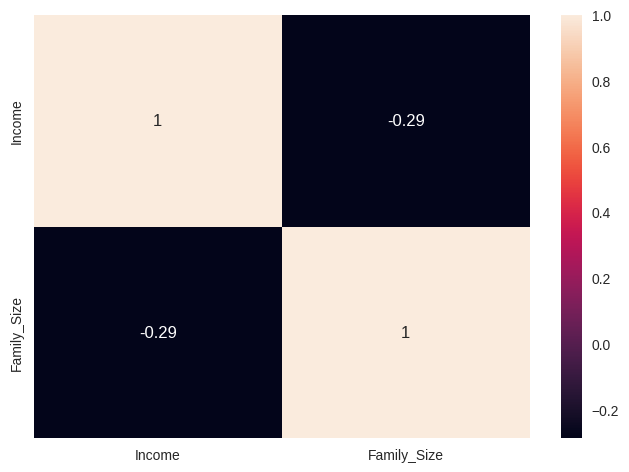

In [ ]:
mkt_data1=df[["Income", "Family_Size"]]
sns.heatmap(mkt_data1.corr(),annot=True)

7 Principal Component Analysis (PCA)

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.select_dtypes(include="int64")

In [ ]:
df2.drop(columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response'])

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Spent,Children,Family_Size,Is_Parent
0,5524,1957,0,0,58,635,88,546,172,88,...,10,4,7,3,11,66,1617,0,0,0
1,2174,1954,1,1,38,11,1,6,2,1,...,1,2,5,3,11,69,27,2,2,1
2,4141,1965,0,0,26,426,49,127,111,21,...,2,10,4,3,11,58,776,0,0,0
3,6182,1984,1,0,26,11,4,20,10,3,...,0,4,6,3,11,39,53,1,1,1
4,5324,1981,1,0,94,173,43,118,46,27,...,3,6,5,3,11,42,422,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,1,0,81,3,3,7,6,2,...,0,2,7,3,11,49,30,1,1,1
2235,10870,1967,0,1,46,709,43,182,42,118,...,3,4,5,3,11,56,1341,1,1,1
2237,7270,1981,0,0,91,908,48,217,32,12,...,3,13,6,3,11,42,1241,0,0,0
2238,8235,1956,0,1,8,428,30,214,80,30,...,5,10,3,3,11,67,843,1,1,1


In [ ]:
df2.columns

Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
df2 = scaler.fit_transform(df2)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df2)

PCA(n_components=3)

<ipython-input-579-8b856bc070d9>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="Set2_r", s=10)


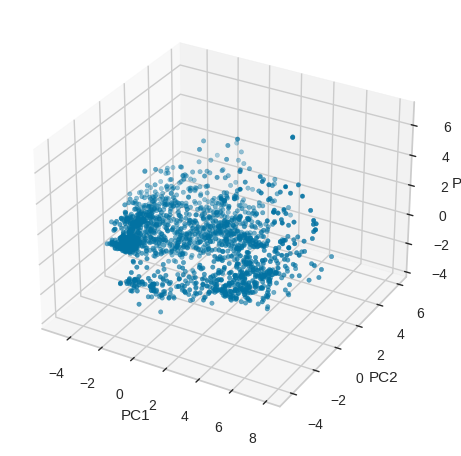

In [ ]:
result=pd.DataFrame(pca.transform(df2), columns=['PCA%i' % i for i in range(3)])

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="Set2_r", s=10)
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

Clustering

Kmeans

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(result)

In [ ]:
from sklearn.cluster import KMeans
centroids = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(result)
    centroids.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

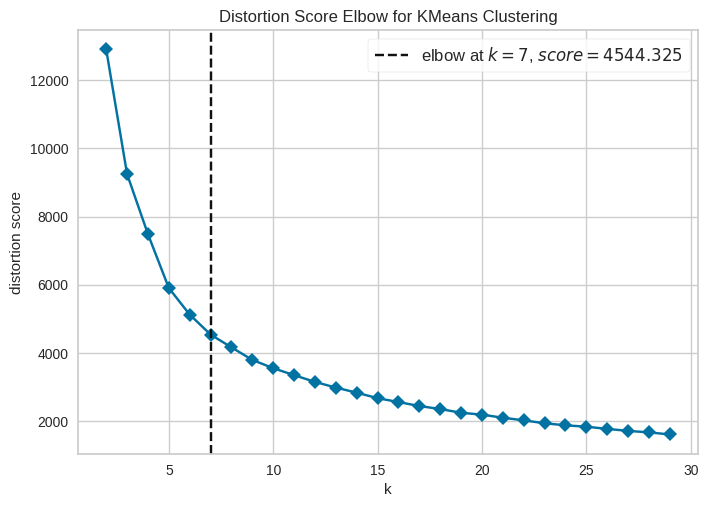

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeanModel, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(result)
# Finalize and render figure
visualizer.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 7)
kmeans_model.fit(result)
label = kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-584-605e46b4eaa2>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(result.iloc[label==i,0], result.iloc[label==i,1], result.iloc[label==i,2], c=np.random.rand(3,))


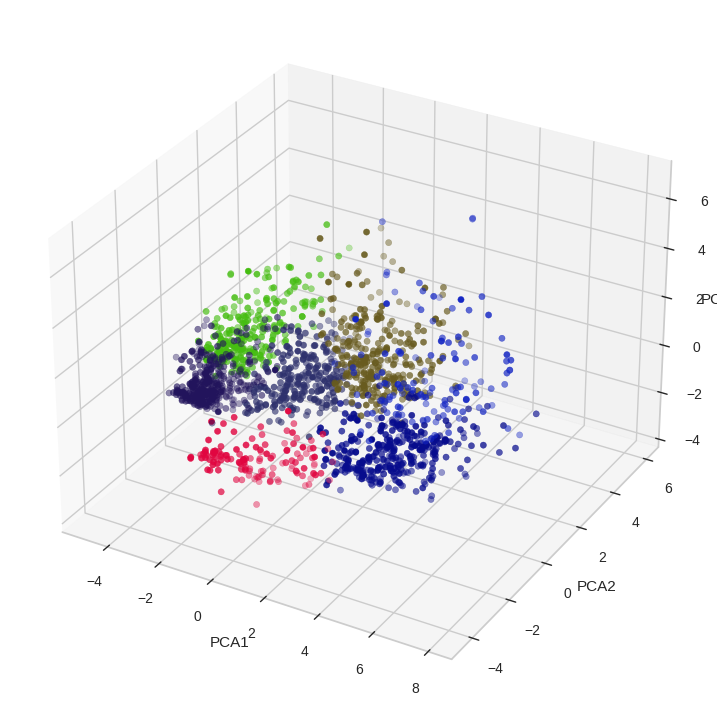

In [ ]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
for i in range(7):
    # Plot the data points for the current cluster
    ax.scatter(result.iloc[label==i,0], result.iloc[label==i,1], result.iloc[label==i,2], c=np.random.rand(3,))

# Add axis labels
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Show the plot
plt.show()

Agglomerative

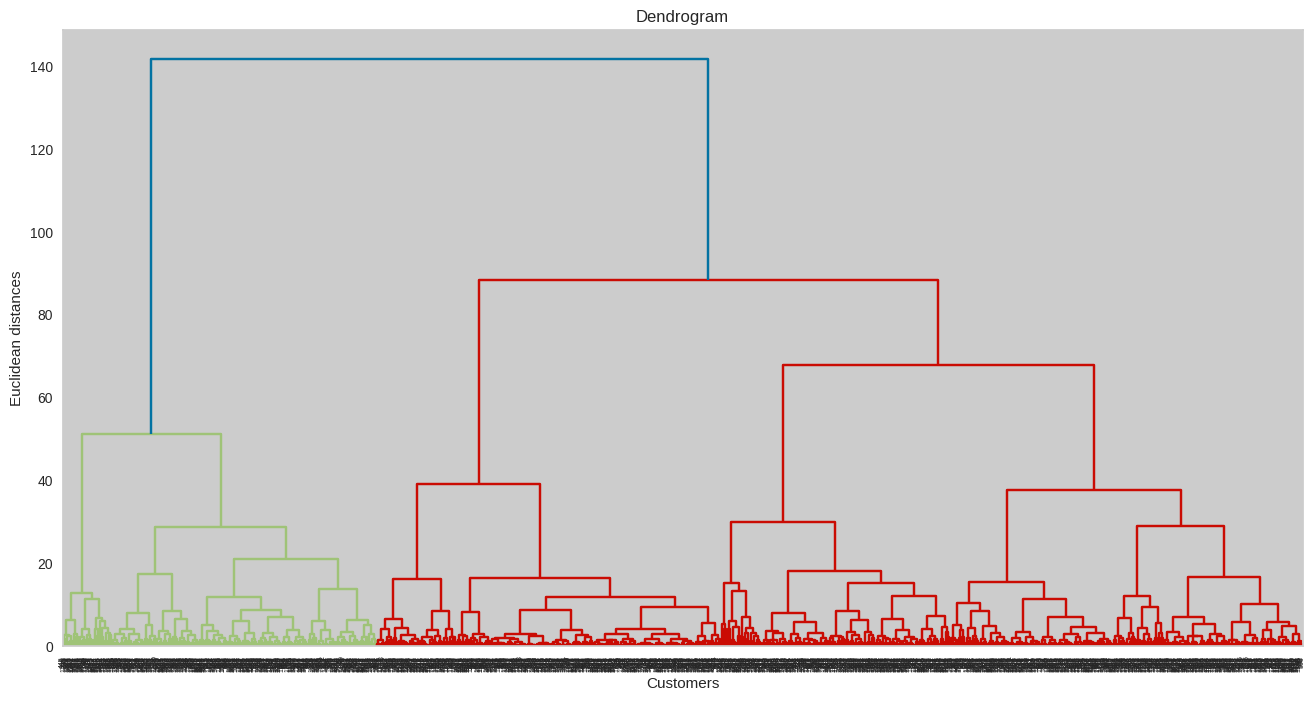

In [ ]:
# importing the required module
import scipy.cluster.hierarchy as sch
# graph size
plt.figure(1, figsize = (16 ,8))
# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(result, method  = "ward"))
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

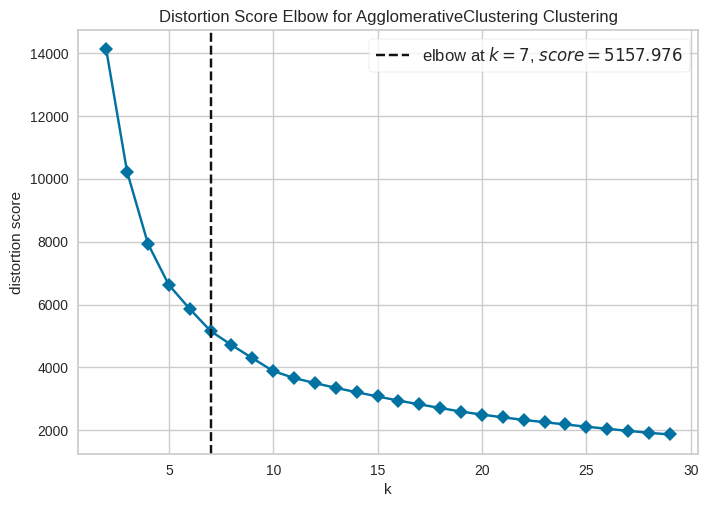

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(result)
# Finalize and render figure
visualizer.show()

In [ ]:
# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='average')
# training the model on dataset
label_agglo = model.fit_predict(result)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<ipython-input-589-25d9ecc15714>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(result.iloc[label_agglo==i,0], result.iloc[label_agglo==i,1], result.iloc[label_agglo==i,2], c=np.random.rand(3,))


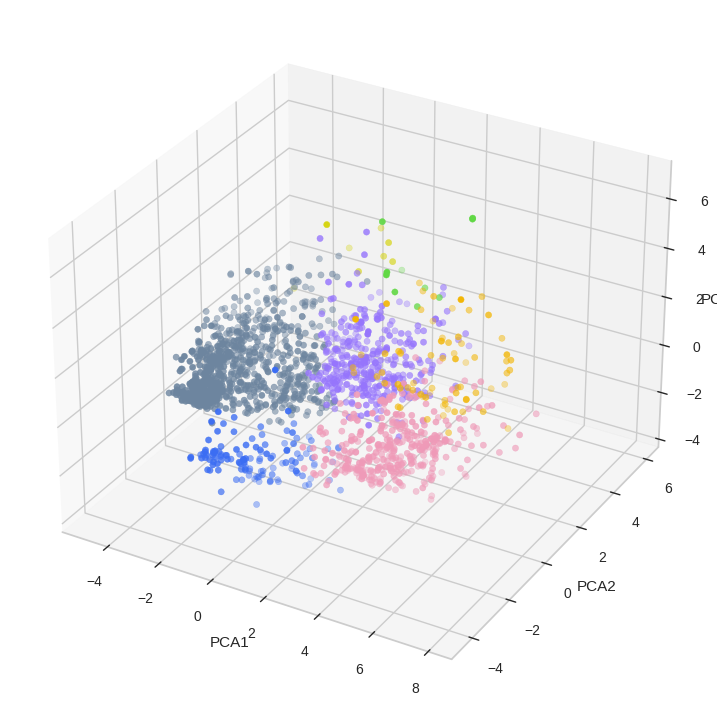

In [ ]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
for i in range(7):
    # Plot the data points for the current cluster
    ax.scatter(result.iloc[label_agglo==i,0], result.iloc[label_agglo==i,1], result.iloc[label_agglo==i,2], c=np.random.rand(3,))

# Add axis labels
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Show the plot
plt.show()